Install necessary packages and functions to load data from Google Cloud Storage and build association rule based recommender system.

In [ ]:
pip install --upgrade google-cloud-storage #install necessary packages to load data from GCP

In [ ]:
pip install fsspec #install necessary packages to load data from GCP

In [ ]:
pip install gcsfs #install necessary packages to load data from GCP

In [ ]:
pip install apriori-python

In [ ]:
!easy_install apriori-python

Searching for apriori-python
Best match: apriori-python 1.0.4
Processing apriori_python-1.0.4-py2.7.egg
apriori-python 1.0.4 is already the active version in easy-install.pth

Using /usr/local/lib/python2.7/dist-packages/apriori_python-1.0.4-py2.7.egg
Processing dependencies for apriori-python
Finished processing dependencies for apriori-python


In [ ]:
import os
from google.cloud import storage
import numpy as np
import pandas as pd
from random import sample 
import matplotlib.pyplot as plt
from apriori_python import apriori
import random

In [ ]:
# load the grocery dataset (original dataset obtained from Kaggle)
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/content/eloquent-life-328614-f56ab675c052.json'
storage_client = storage.Client()
bucket = storage_client.get_bucket('data5006_batch')
file = "gs://data5006_batch/Gamebasket1.csv"
trans = pd.read_csv(file) # load in the purchase tranactions
trans=trans.drop(columns=['year'])
print(trans)
 # group transactions into baskets (a series of lists)
baskets = trans.groupby('UserID')['item'].apply(list)
baskets 

        UserID  item
0            0    69
1            0    88
2            1    22
3            1    67
4            1    69
...        ...   ...
207821    4995    27
207822    4996    27
207823    4997    27
207824    4998    27
207825    4999    27

[207826 rows x 2 columns]


UserID
0                                     [69, 88]
1                     [22, 67, 69, 72, 85, 88]
2                 [22, 66, 67, 69, 72, 85, 88]
3        [22, 65, 66, 67, 68, 69, 72, 85, 128]
4       [22, 65, 66, 68, 69, 72, 85, 128, 168]
                         ...                  
4995                                      [27]
4996                                      [27]
4997                                      [27]
4998                                      [27]
4999                                      [27]
Name: item, Length: 5000, dtype: object

In [ ]:
ranknums=trans.groupby('item')['UserID'].apply(list)
ranknums

item
1      [1592, 1593, 1594, 1595, 1596, 1597, 1598, 159...
2      [1441, 1442, 1443, 1444, 1445, 1446, 1447, 144...
3      [77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 8...
4      [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3...
5      [118, 119, 120, 121, 122, 123, 124, 125, 126, ...
                             ...                        
166    [301, 302, 303, 304, 305, 306, 307, 308, 309, ...
167    [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1...
168    [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...
169    [45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 5...
170    [397, 398, 399, 400, 401, 402, 403, 404, 405, ...
Name: UserID, Length: 170, dtype: object

In [ ]:
##Create the droplist for games ranked less than n
droplistindex0=[]
for i, element in enumerate(ranknums):
  if len(element) <2000:####set the minimum rated times
    droplistindex0.append(i)
droplistindex0=np.array(droplistindex0)
print(droplistindex0)
print('items left:'),print(170-len(droplistindex0))

[  1   2   3   4   5   6   7  10  11  12  14  16  17  18  19  20  21  23
  24  25  28  29  30  31  32  34  35  36  38  39  40  41  43  44  45  46
  48  49  51  52  53  55  56  57  58  59  60  61  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  87
  88  89  90  92  93  95  97  98 100 101 102 104 105 107 108 109 110 112
 113 115 116 117 118 119 120 121 123 124 127 128 129 131 133 134 135 136
 137 138 141 142 144 145 147 148 149 150 152 153 154 157 158 161 162 165
 166 167 168 169]
items left:
40


(None, None)

In [ ]:
###get the index of unwanted items
delindex=[]
for i,x in enumerate(trans.item):
  if x in droplistindex0:
   delindex.append(i)
print(delindex)

delindex=np.array(delindex)

[0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 56, 57, 58, 59, 60, 61, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182, 183, 185, 186, 187, 188, 189, 190, 191, 192, 194, 195, 196, 197, 198, 199, 201, 202, 203, 204, 205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 217, 218, 219, 220, 221, 222, 223, 224, 226, 227, 228, 229, 230, 231, 232, 234, 235, 236, 237, 238, 239, 240, 241, 242, 244, 245, 246, 247, 248, 249

In [ ]:
##delete unwanted transaction
trans=trans.drop(index=delindex)  
print(trans)

        UserID  item
2            1    22
8            2    22
15           3    22
24           4    22
33           5    22
...        ...   ...
207821    4995    27
207822    4996    27
207823    4997    27
207824    4998    27
207825    4999    27

[54095 rows x 2 columns]


In [ ]:
# load the game names and create the cmap (look-up dictionary)
file = "gs://data5006_batch/GameName.csv"
gamenames = pd.read_csv(file) 
gamenames.columns = ['item','title']
gamenames['title'] = gamenames['title'].str.strip()
gamenames

,item,title
0,1,Grand Theft Auto: San Andreas
1,2,League of Stickman - Best action game(Dreamsky)
2,3,Shadow Knight Arena: Online Fighting Game
3,4,Cyber Fighters: League of Cyberpunk Stickman 2077
4,5,Stickman Master: League Of Shadow - Ninja Fight
...,...,...
165,166,Sporcle
166,167,Majotori
167,168,Endless Quiz Pro
168,169,Classic Words Plus


In [ ]:
# join the two datasets
trans = pd.merge(trans, gamenames, on="item")
##get all item names
allitems=np.unique(trans['title'])
print('all items:',allitems)


all items: ['Bloons TD 5' 'Bloons TD 6' 'Cartoon Craft'
 'Dungeon Corporation P : (An auto-farming RPG game)' 'Dungeon Maker'
 "Everybody's RPG" "Five Nights at Freddy's" 'Football Agent'
 'Football Chairman Pro - Build a Soccer Empire'
 'Galaxy Shooter : Falcon Squad Premium' 'Galaxy Warrior: Alien Attack'
 'Geometry Dash' 'Human: Fall Flat'
 'Illegal Race Tuning - Real car racing multiplayer'
 'Kingdom Rush Origins - Tower Defense Game' 'Lara Croft GO'
 'Lowriders Comeback 2: Cruising'
 'Monopoly - Board game classic about real-estate!'
 'Motorsport Manager Mobile 3'
 'My Celestial Tree VIP - Unique Beautiful Game'
 'My Singing Monsters Composer'
 'Mystic Guardian PV: Old School Action RPG' 'NBA 2K20' 'Neo Monsters'
 'Reigns: Game of Thrones' 'Riptide GP2' 'Rusted Warfare - RTS Strategy'
 'Shadow Fight 2 Special Edition'
 'Shadow of Death: Dark Knight - Stickman Fighting' 'Splendor'
 'Stickman Ghost: Ninja Warrior Action Offline Game'
 "THE KING OF FIGHTERS '98" 'The Escapists 2: Poc

In [ ]:
baskets = trans.groupby('UserID')['title'].apply(list)  # convert transactions into baskets (a series of lists)
baskets[0:30]

UserID
1                             [ì„œìš¸ 2033 : í›„ì›ìž]
2                             [ì„œìš¸ 2033 : í›„ì›ìž]
3                             [ì„œìš¸ 2033 : í›„ì›ìž]
4                             [ì„œìš¸ 2033 : í›„ì›ìž]
5                             [ì„œìš¸ 2033 : í›„ì›ìž]
6     [ì„œìš¸ 2033 : í›„ì›ìž, Dungeon Corporation ...
7     [ì„œìš¸ 2033 : í›„ì›ìž, Dungeon Corporation ...
8     [ì„œìš¸ 2033 : í›„ì›ìž, Dungeon Corporation ...
9     [ì„œìš¸ 2033 : í›„ì›ìž, Dungeon Corporation ...
10    [Dungeon Corporation P : (An auto-farming RPG ...
11    [Dungeon Corporation P : (An auto-farming RPG ...
12    [Dungeon Corporation P : (An auto-farming RPG ...
13    [Dungeon Corporation P : (An auto-farming RPG ...
14    [Dungeon Corporation P : (An auto-farming RPG ...
15    [Dungeon Corporation P : (An auto-farming RPG ...
16    [Dungeon Corporation P : (An auto-farming RPG ...
17    [Dungeon Corporation P : (An auto-farming RPG ...
18    [Dungeon Corporation P : (An auto-f

In [ ]:
# do some simple data visualisation/data exploration
# first define a function to return the unique set of all items (as a freq dictionary)

def itemcounts(itemsets):
    allitems = dict()
    for its in itemsets:
        for i in its:
            if i in allitems.keys():
                allitems[i] = allitems[i] + 1
            else:
                allitems[i] = 1  
    return allitems

itemfreqcnts = itemcounts(baskets) # count item frequencies
sorted(itemfreqcnts.items(), key=lambda kv: kv[1], reverse=True) # reverse sort by frequency

[('Geometry Dash', 3000),
 ('Bloons TD 5', 2995),
 ('Bloons TD 6', 2796),
 ('Neo Monsters', 2609),
 ("Five Nights at Freddy's", 2592),
 ('Kingdom Rush Origins - Tower Defense Game', 2241),
 ('NBA 2K20', 2194),
 ('Shadow of Death: Dark Knight - Stickman Fighting', 1995),
 ('The Game of Life', 1990),
 ('The Room Three', 1952),
 ('Wordfeud', 1899),
 ("Everybody's RPG", 1815),
 ('Monopoly - Board game classic about real-estate!', 1796),
 ('Townsmen Premium', 1745),
 ('Shadow Fight 2 Special Edition', 1689),
 ('This War of Mine', 1657),
 ('Lara Croft GO', 1631),
 ('Cartoon Craft', 1630),
 ('Riptide GP2', 1601),
 ('Dungeon Maker', 1532),
 ('Human: Fall Flat', 1517),
 ('Motorsport Manager Mobile 3', 1409),
 ('Rusted Warfare - RTS Strategy', 1377),
 ('Mystic Guardian PV: Old School Action RPG', 1277),
 ('Reigns: Game of Thrones', 1193),
 ('The Escapists 2: Pocket Breakout', 1093),
 ("THE KING OF FIGHTERS '98", 952),
 ('Football Chairman Pro - Build a Soccer Empire', 923),
 ('My Singing Monster

<BarContainer object of 20 artists>

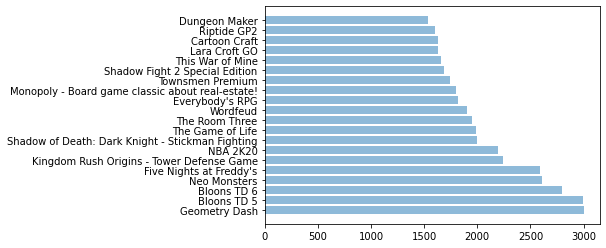

In [ ]:
# display as histogram
rankeditems = [k for k,v in sorted(itemfreqcnts.items(), key=lambda kv: kv[1], reverse=True)]
frequencies = [v for k,v in sorted(itemfreqcnts.items(), key=lambda kv: kv[1], reverse=True)]
topN=20
plt.barh(rankeditems[0:topN], frequencies[0:topN], align='center', alpha=0.5)


In [ ]:
#get the dropindex of baskets for ranking numers less than n
droplistindex1 = []
for i,x in enumerate(baskets,start=1):
  if len(x) < 6:###set the minimum comment times of gamer
    droplistindex1.append(i)
    
print(droplistindex1)
print("the rest user",4999-len(droplistindex1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 3990, 3991, 3992, 3993, 3994, 3995, 3996, 3997, 3998, 3999, 4000, 4001, 4002, 4003, 4004, 4005, 4006, 4007, 4008, 4009, 4010, 4011, 4012, 4013, 4014, 4015, 4016, 4017, 4018, 4019, 4020, 4021, 4022, 4023, 4024, 4025, 4026, 4027, 4028, 4029, 4030, 4031, 4032, 4033, 4034, 4035, 4036, 4037, 4038, 4039, 4040, 4041, 4042, 4043, 4044, 4045, 4046, 4047, 4048, 4049, 4050, 4051, 4052, 4053, 4054, 4055, 4056, 4057, 4058, 4059, 4060, 4061, 4062, 4063, 4064, 4065, 4066, 4067, 4068, 4069, 4070, 4071, 4072, 4073, 4074, 4075, 4076, 4077, 4078, 4079, 4080, 4081, 4082, 4083, 4084, 4085, 4086, 4087, 4088, 4089, 4090, 4091, 4092, 4093, 4094, 4095, 4096, 4097, 4098, 4099, 4100, 4101, 4102, 4103, 4104

In [ ]:
###delete the users with #get the dropindex of baskets for 
for i in droplistindex1: 
 del baskets[i]
print(baskets)

UserID
81      [Football Agent, Triple Fantasy Premium, Galax...
82      [Football Agent, Triple Fantasy Premium, Galax...
83      [Football Agent, Triple Fantasy Premium, Galax...
84      [Football Agent, Triple Fantasy Premium, Galax...
85      [Football Agent, Triple Fantasy Premium, Galax...
                              ...                        
3985    [Bloons TD 6, Neo Monsters, Bloons TD 5, Five ...
3986    [Bloons TD 6, Neo Monsters, Bloons TD 5, Five ...
3987    [Bloons TD 6, Neo Monsters, Bloons TD 5, Five ...
3988    [Bloons TD 6, Neo Monsters, Bloons TD 5, Five ...
3989    [Bloons TD 6, Neo Monsters, Bloons TD 5, Five ...
Name: title, Length: 3909, dtype: object


In [ ]:
# to test the rules we first divide the baskets into training and test sets and then rebuild the ruleset
testsize = int(len(baskets)*0.1); testsize # set the size of the test set
random.seed(100)##set seed to get the same trainset
testids  = random.sample(list(baskets.index),testsize)
trainids = list(set(baskets.index) - set(testids))
trainbaskets = baskets[trainids]
testbaskets  = baskets[testids]
trainbaskets

UserID
81      [Football Agent, Triple Fantasy Premium, Galax...
82      [Football Agent, Triple Fantasy Premium, Galax...
83      [Football Agent, Triple Fantasy Premium, Galax...
84      [Football Agent, Triple Fantasy Premium, Galax...
85      [Football Agent, Triple Fantasy Premium, Galax...
                              ...                        
3985    [Bloons TD 6, Neo Monsters, Bloons TD 5, Five ...
3986    [Bloons TD 6, Neo Monsters, Bloons TD 5, Five ...
3987    [Bloons TD 6, Neo Monsters, Bloons TD 5, Five ...
3988    [Bloons TD 6, Neo Monsters, Bloons TD 5, Five ...
3989    [Bloons TD 6, Neo Monsters, Bloons TD 5, Five ...
Name: title, Length: 3519, dtype: object

In [ ]:
testbaskets

UserID
677     [Rusted Warfare - RTS Strategy, Reigns: Game o...
1963    [Lara Croft GO, The Room Three, Wordfeud, Ever...
1944    [Lara Croft GO, The Room Three, Wordfeud, Ever...
3979    [Bloons TD 6, Neo Monsters, Bloons TD 5, Five ...
3238    [Bloons TD 6, Shadow of Death: Dark Knight - S...
                              ...                        
224     [Football Agent, Stickman Ghost: Ninja Warrior...
139     [Football Agent, Galaxy Shooter : Falcon Squad...
1001    [Rusted Warfare - RTS Strategy, Reigns: Game o...
2156    [The Room Three, Wordfeud, Everybody's RPG, To...
543     [Rusted Warfare - RTS Strategy, Reigns: Game o...
Name: title, Length: 390, dtype: object

In [ ]:
# for correct testing we rebuild the ruleset using the training baskets only
freqItemSet, rules = apriori(baskets, minSup=0.3, minConf=0.5); len(rules) 
freqItemSet### the num of items in a subset
print("number of rules generated=",len(rules)) 

number of rules generated= 140260


In [ ]:
# show each unique item (rule RHS) that can be recommended by the ruleset and the number of rules that recommend that item

def RHSitems(rules):
    allitems = dict()
    for LHS, RHS, conf in rules:
        for item in RHS:
            if item in allitems.keys():
                allitems[item] = allitems[item] + 1
            else:
                allitems[item] = 1
    return allitems

ruleRHSitems = RHSitems(rules)
print("number of recommendable items=",len(ruleRHSitems))
ruleRHSitems 

number of recommendable items= 25


{'Bloons TD 5': 3823,
 'Bloons TD 6': 3943,
 'Cartoon Craft': 37677,
 'Dungeon Maker': 19175,
 "Everybody's RPG": 43317,
 "Five Nights at Freddy's": 3787,
 'Geometry Dash': 2059,
 'Human: Fall Flat': 23417,
 'Kingdom Rush Origins - Tower Defense Game': 26801,
 'Lara Croft GO': 41923,
 'Monopoly - Board game classic about real-estate!': 2059,
 'Motorsport Manager Mobile 3': 19175,
 'Mystic Guardian PV: Old School Action RPG': 19171,
 'NBA 2K20': 3823,
 'Neo Monsters': 3865,
 'Reigns: Game of Thrones': 1,
 'Riptide GP2': 37677,
 'Rusted Warfare - RTS Strategy': 6,
 'Shadow Fight 2 Special Edition': 24849,
 'Shadow of Death: Dark Knight - Stickman Fighting': 3829,
 'The Game of Life': 4049,
 'The Room Three': 43317,
 'This War of Mine': 7737,
 'Townsmen Premium': 43317,
 'Wordfeud': 43317}

In [ ]:
# define a function to execute a rule if any subset of the basket matches a rule LHS
# does not return any RHS item if its also within the LHS
# if many rules output (ie recommend) the same item then return the highest confidence for that item
# outputs a list of tuples: (item, confidence) for the topN items with highest confidence
def execrules_anymatch(itemset,rules,topN=10):
    preds = dict()
    for LHS, RHS, conf in rules:
        if LHS.issubset(itemset):
            for pitem in RHS:
                # ignore rules like A => A
                if not pitem in itemset:
                    if pitem in preds.keys():
                        preds[pitem] = max(preds[pitem],conf)
                    else:
                        preds[pitem] = conf                
    recs = sorted(preds.items(), key=lambda kv: kv[1], reverse=True)
    return recs[0:min(len(recs),topN)]

In [ ]:
# make recommendations for one basket in the testset (e.g. for one user at basket checkout time)
# results are output in decreasing order of rule confidence
userID = 1
testbasket = testbaskets.iloc[userID]
print("selected user's basket=",testbasket,"\nrecommended items=")
execrules_anymatch(testbasket, rules) # anymatch allows any subset of the testbasket to match a rule LHS

selected user's basket= ['Lara Croft GO', 'The Room Three', 'Wordfeud', "Everybody's RPG", 'Townsmen Premium', 'Human: Fall Flat', 'Kingdom Rush Origins - Tower Defense Game', 'Shadow Fight 2 Special Edition', 'This War of Mine', 'The Game of Life', 'Bloons TD 6', 'Shadow of Death: Dark Knight - Stickman Fighting', 'Neo Monsters', 'NBA 2K20', 'Bloons TD 5', "Five Nights at Freddy's", 'Monopoly - Board game classic about real-estate!'] 
recommended items=


[('Cartoon Craft', 0.9668914776210914),
 ('Riptide GP2', 0.9515634580012262),
 ('Geometry Dash', 0.8864142538975501),
 ('Dungeon Maker', 0.8252605763335377),
 ('Mystic Guardian PV: Old School Action RPG', 0.8162866449511401),
 ('Motorsport Manager Mobile 3', 0.8129981606376456)]

In [ ]:
# Define a Holdback test for a set of association rules on a testset, also compute rule lift over random.
# For each basket: do tpb (testsperbasket) tests by holding out in turn the first, second, third etc items in the testitems.
# Compute a random recommendation only when a rule-based recommendation is also made (for accurate comparison with the ruleset).
# We assume virtual items (if any) occur at the start of the basket:
# usually virtual items (eg age, gender) are not items that we wish to recommend hence testitemstart indicates 
# the start of the items that are to be tested (ie can be recommended).

def rulehits_holdout_lift(testbaskets, rules, allitems, topN=10, tpb=5, itemstart=0):
    tothits = tottests = totrecs = totrhits = totrrecs = 0
    for testbasket in testbaskets:
        virtualitems = testbasket[:itemstart]
        testitems   = testbasket[itemstart:]
        numtests = min(len(testitems),tpb)
        for i in range(0,numtests):
            recs = execrules_anymatch(virtualitems+testitems[:i]+testitems[i+1:], rules, topN) # omit (holdout) the ith testitem
            nrecs = len(recs)
            if (nrecs > 0):
                recitems = set()
                for item, conf in recs: recitems.add(item) # strip out the confidences
                tothits = tothits + int(testitems[i] in recitems) # increment if testitem is in the recommended items
                totrecs = totrecs + nrecs
                tottests = tottests + 1
                # now do the random recommendations
                unseenitems = set(allitems) - set(testitems[:i]+testitems[i+1:]) # remove the holdout item
                recitems = sample(unseenitems,min(topN,len(unseenitems),nrecs))
                nrecs = len(recitems)
                totrhits = totrhits + int(testitems[i] in recitems) # increment if testitem is in the recommended items
                totrrecs = totrrecs + nrecs
    if (totrecs == 0 or totrrecs == 0 or totrhits == 0):
        print("no recommendations made, please check your inputs")
        return np.nan
    print("number of holdbacks=",tottests,
          "recommendeditems=",totrecs,
          "hits=",tothits,
          "({:.2f}%)".format(tothits*100/totrecs),
          "randomrecommendeditems=",totrrecs,
          "randomhits=",totrhits,
          "({:.2f}%)".format(totrhits*100/totrrecs),
          "rulelift={:.2f}".format((tothits/totrecs)/(totrhits/totrrecs))) 
    return tothits, totrecs, tottests, totrhits, totrrecs

In [ ]:
# test the ruleset on the testset using holdout_1 testing ....
# we set topN = 5 and tests per basket (tpb) = 5
# Are the rules better than random? check the lift over random

_ = rulehits_holdout_lift(testbaskets, rules, allitems, topN=5, tpb=5)

number of holdbacks= 1947 recommendeditems= 8928 hits= 1643 (18.40%) randomrecommendeditems= 8928 randomhits= 341 (3.82%) rulelift=4.82
